## Set up and load setup

### Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus : 
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove Dodgy images

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\Naren\AppData\Local\Temp\ipykernel_16304\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = "data"

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [183]:
for image_class in os.listdir(data_dir) :
    for image in os.listdir(os.path.join(data_dir, image_class)) :
        image_path = os.path.join(data_dir, image_class, image)
        try :
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts :
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image {image_path}")

### Load Data

In [7]:
import numpy as np

In [184]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 7848 files belonging to 2 classes.


In [128]:
data_iterator = data.as_numpy_iterator()

In [129]:
batch = data_iterator.next()

In [130]:
len(batch)  #(images as numpy arrays, labels)

2

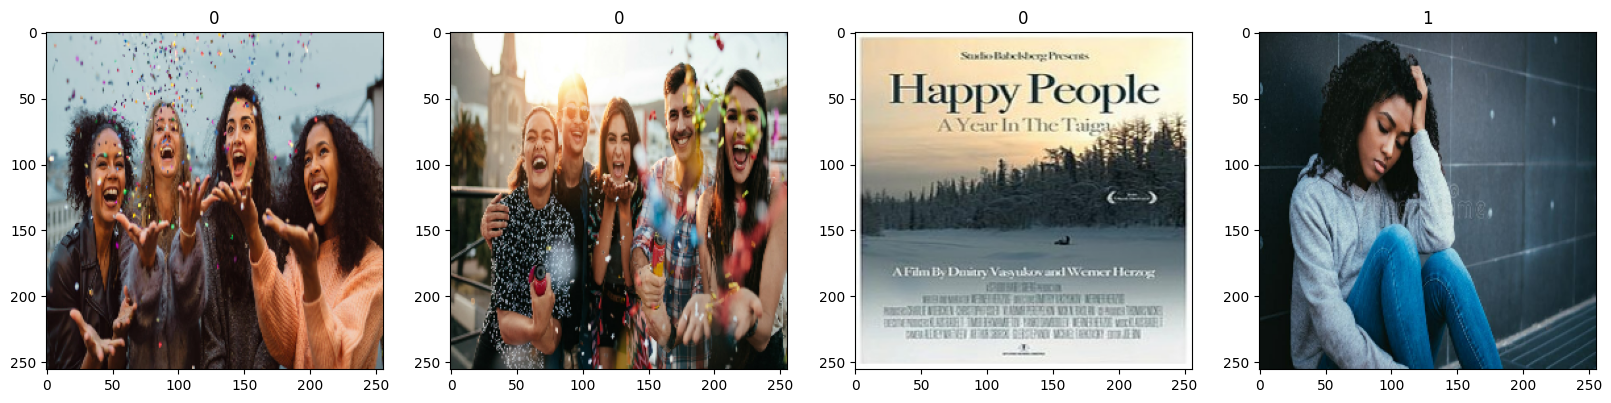

In [131]:
## Class 1 = sad
## Class 0 = happy

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [132]:
scaled = batch[0]/255

In [133]:
scaled.max()

1.0

## Preprocessing Data

### Scale data

In [185]:
data = data.map(lambda x, y : (x/255, y))

In [186]:
scaled_iterator = data.as_numpy_iterator()
batch_scaled = scaled_iterator.next()

In [187]:
batch_scaled[0].max()

1.0

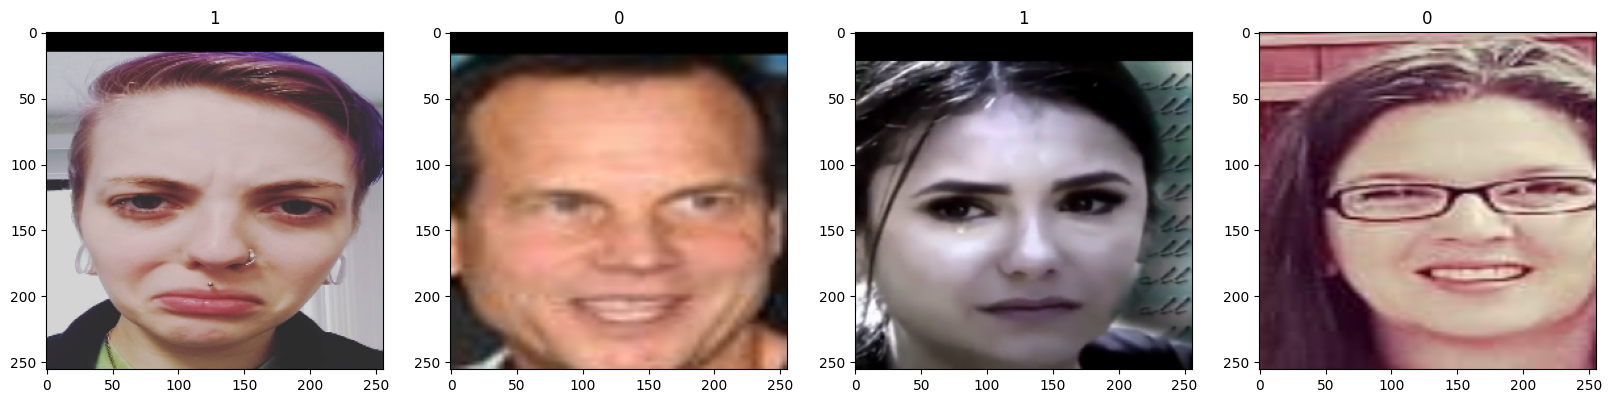

In [188]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_scaled[0][:4]) :
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

### Split data

In [189]:
len(data)

246

In [190]:
train_size, val_size, test_size = int(len(data)*0.7), int(len(data)*0.2), int(len(data)*0.1)+1

In [191]:
train_size+val_size+test_size

246

In [192]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Model

### Build Deep Learning Model

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [193]:
model = Sequential()

In [194]:
# 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [195]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [196]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

### Train

In [197]:
logdir = 'logs'

In [198]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [219]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5


172/172 [==============================] - 127s 735ms/step - loss: 0.3922 - accuracy: 0.8285 - val_loss: 0.4128 - val_accuracy: 0.8131
Epoch 2/5
172/172 [==============================] - 129s 746ms/step - loss: 0.3085 - accuracy: 0.8705 - val_loss: 0.3753 - val_accuracy: 0.8310
Epoch 3/5
172/172 [==============================] - 132s 763ms/step - loss: 0.2388 - accuracy: 0.9021 - val_loss: 0.4402 - val_accuracy: 0.8253
Epoch 4/5
172/172 [==============================] - 141s 814ms/step - loss: 0.1858 - accuracy: 0.9226 - val_loss: 0.3930 - val_accuracy: 0.8393
Epoch 5/5
172/172 [==============================] - 130s 747ms/step - loss: 0.1333 - accuracy: 0.9477 - val_loss: 0.5568 - val_accuracy: 0.8316


### Plot Performance

In [220]:
hist.history

{'loss': [0.3921901285648346,
  0.30845311284065247,
  0.23879554867744446,
  0.1857966184616089,
  0.13325507938861847],
 'accuracy': [0.8284883499145508,
  0.8704578280448914,
  0.9020712375640869,
  0.9226017594337463,
  0.9476743936538696],
 'val_loss': [0.4128158688545227,
  0.37527310848236084,
  0.44021064043045044,
  0.39297905564308167,
  0.5568327307701111],
 'val_accuracy': [0.8131377696990967,
  0.8309949040412903,
  0.8252550959587097,
  0.8392857313156128,
  0.831632673740387]}

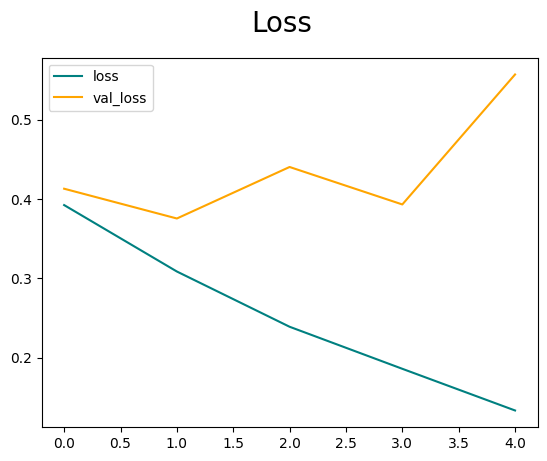

In [221]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

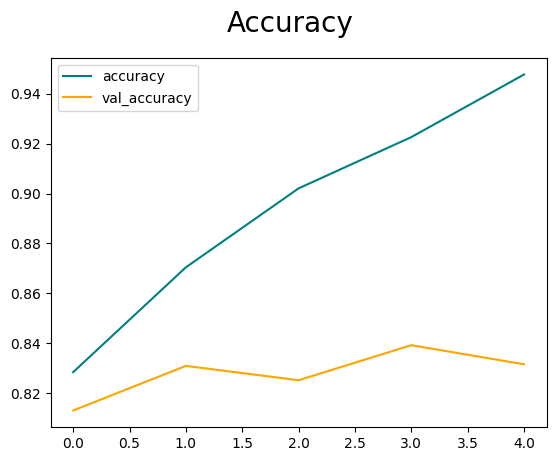

In [222]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance

### Evaluate

In [153]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [223]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [224]:
for batch in test.as_numpy_iterator() :
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [225]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision:0.756302535533905, Recall:0.9254498481750488, Accuracy: 0.813144326210022


### Test

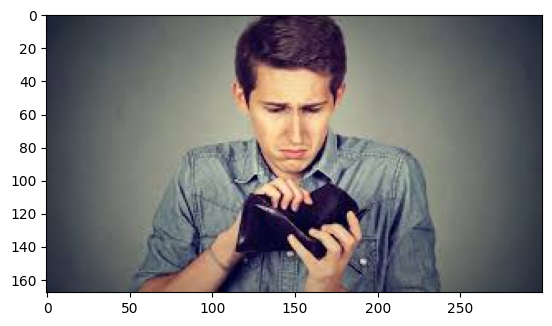

In [236]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

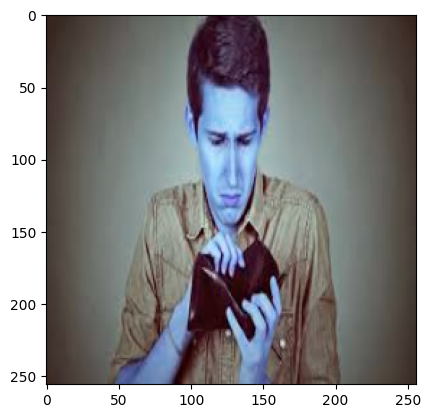

In [237]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [238]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [239]:
yhat

array([[0.99344975]], dtype=float32)

In [240]:
if yhat > 0.5 : print(f"Predicted class is Sad")
else : print(f"Predicted class is Happy")

Predicted class is Sad


## Save the Model

In [241]:
from tensorflow.keras.models import load_model

In [242]:
model.save(os.path.join('models', 'imageClassifier2.h5'))

In [243]:
new_model = load_model(os.path.join('models', 'imageClassifier2.h5'))

In [244]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


In [245]:
if yhat_new > 0.5 : print(f"Predicted class is Sad")
else : print(f"Predicted class is Happy")

Predicted class is Sad
